In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM,Dense
import pandas_datareader as web
plt.style.use("fivethirtyeight")
import datetime as dt
import yfinance as yf

In [2]:
company = 'FROTO.IS'

# Bir başlangıç ​​tarihi ve Bitiş Tarihi tanımlayın
start = dt.datetime(2020,1,1)
end =  dt.datetime(2024,5,1)

# Hisse Senedi Fiyat Verilerini Oku
df = yf.download(company, start , end)

df.tail(10)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-03-20,569.599976,569.599976,552.799988,556.000000,556.000000,1255195
2023-03-21,558.000000,580.099976,553.599976,566.900024,566.900024,1918552
2023-03-22,570.000000,593.599976,566.400024,591.500000,591.500000,1629384
2023-03-23,591.400024,605.700012,586.099976,604.799988,604.799988,1648786
2023-03-24,607.599976,608.500000,588.400024,601.900024,601.900024,1424059
2023-03-27,602.400024,607.599976,591.799988,603.400024,603.400024,1194394
2023-03-28,603.000000,610.799988,588.000000,590.099976,590.099976,1888140
2023-03-29,589.900024,604.099976,575.500000,603.099976,603.099976,1579998
2023-03-30,602.299988,609.099976,598.000000,598.000000,598.000000,1107420


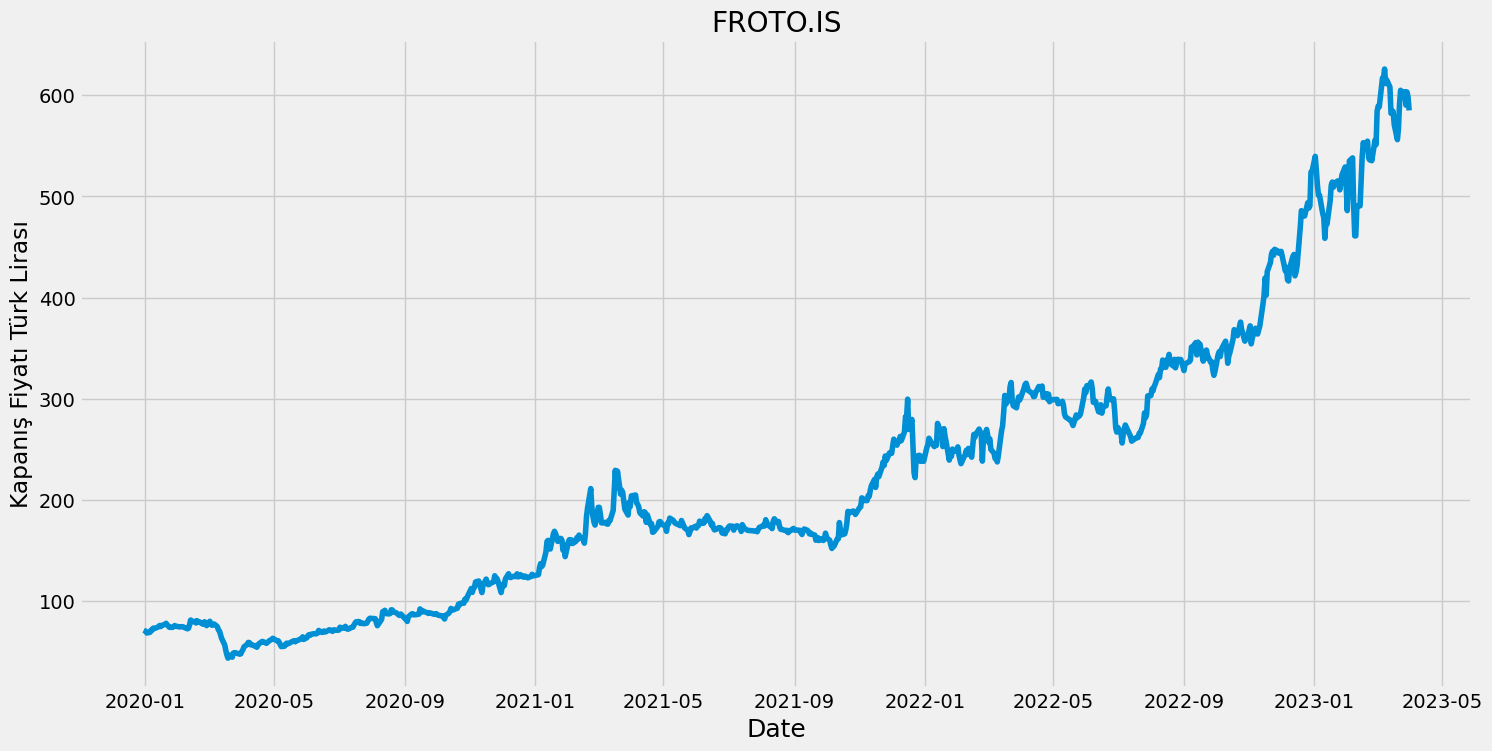

In [3]:
#Verileri filtrele
data = df.filter(["Close"])

#Görselleştirme
plt.figure(figsize=(16,8))
plt.plot(data["Close"])
plt.xlabel("Date",fontsize=18)
plt.ylabel("Kapanış Fiyatı Türk Lirası")
plt.title("FROTO.IS")
plt.show()

In [4]:
#Yalnızca Kapat sütunuyla yeni bir DataFrame oluştur
data = df.filter(["Close"])

#Veri çerçevesini bir numpy dizisine dönüştür
dataset = data.values

#Modeli eğitmek için satır sayısını al
training_data_len = math.ceil(len(dataset) * 0.8)
print(training_data_len)

655


In [5]:
#Verileri ölçeklendir
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.04740639],
       [0.04551701],
       [0.04268292],
       [0.04388527],
       [0.04766403],
       [0.04757816],
       [0.05084163],
       [0.05041223],
       [0.05230162],
       [0.0537616 ],
       [0.05547922],
       [0.05358984],
       [0.0555651 ],
       [0.05736861],
       [0.05908623],
       [0.05616627],
       [0.05479217],
       [0.0523875 ],
       [0.05221574],
       [0.05333219],
       [0.05522158],
       [0.05427688],
       [0.05393336],
       [0.05290279],
       [0.05333219],
       [0.05333219],
       [0.05298866],
       [0.05212985],
       [0.04981106],
       [0.05075576],
       [0.05659568],
       [0.0646685 ],
       [0.06200618],
       [0.06243559],
       [0.05968739],
       [0.06355205],
       [0.06131914],
       [0.06183442],
       [0.05814153],
       [0.05754037],
       [0.06174855],
       [0.0578839 ],
       [0.05522158],
       [0.06252147],
       [0.05865682],
       [0.05573687],
       [0.05728272],
       [0.057

In [6]:
#Eğitim veri setini oluştur
#Ölçeklendirilmiş eğitim veri setini oluştur

train_data = scaled_data[0:training_data_len,:]

#Verileri x_train ve y_train veri kümelerine ayırın
x_train = []
y_train = []

for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i <= 60:
    print(x_train)
    print(y_train)
    print()

[array([0.04740639, 0.04551701, 0.04268292, 0.04388527, 0.04766403,
       0.04757816, 0.05084163, 0.05041223, 0.05230162, 0.0537616 ,
       0.05547922, 0.05358984, 0.0555651 , 0.05736861, 0.05908623,
       0.05616627, 0.05479217, 0.0523875 , 0.05221574, 0.05333219,
       0.05522158, 0.05427688, 0.05393336, 0.05290279, 0.05333219,
       0.05333219, 0.05298866, 0.05212985, 0.04981106, 0.05075576,
       0.05659568, 0.0646685 , 0.06200618, 0.06243559, 0.05968739,
       0.06355205, 0.06131914, 0.06183442, 0.05814153, 0.05754037,
       0.06174855, 0.0578839 , 0.05522158, 0.06252147, 0.05865682,
       0.05573687, 0.05728272, 0.05796977, 0.05341807, 0.04817933,
       0.0460323 , 0.03993473, 0.03375129, 0.02215734, 0.01262453,
       0.00532463, 0.        , 0.00525593, 0.00158022, 0.00858811])]
[0.009275165965215326]



In [7]:
#x_train ve y_train'i numpy dizilerine dönüştür
x_train,y_train = np.array(x_train),np.array(y_train)

In [8]:
#Verileri yeniden şekillendir
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(595, 60, 1)

In [9]:
#LSTM Modelini Oluşturun
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [10]:
#Modeli derle
model.compile(optimizer="adam",loss="mean_squared_error")

In [11]:
#Modeli eğit
model.fit(x_train,y_train,batch_size=1, epochs=1)

595/595 [==============================] - 9s 12ms/step - loss: 0.0013


In [12]:
#Test veri setini oluştur
#1543'ten 2003'e ölçeklenmiş değerler içeren yeni bir dizi oluştur

test_data = scaled_data[training_data_len - 60:, :]

#x_test ve y_test veri kümelerini oluştur

x_test = []
y_test = dataset[training_data_len:,:]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [13]:
#Verileri bir numpy dizisine dönüştür
x_test = np.array(x_test)

In [14]:
#Verileri yeniden şekillendir
x_test = np.reshape(x_test,(x_test.shape[0], x_test.shape[1], 1))

In [15]:
#Modellerin tahmin edilen fiyat değerlerini alın
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

6/6 [==============================] - 0s 7ms/step


In [16]:
#Kök ortalama kare hatasını al (RMSE)
rmse = np.sqrt( np.mean(predictions - y_test)**2)
rmse

43.89014102491133

C:\Users\Serkan POLAT\AppData\Local\Temp\ipykernel_2660\191800004.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid["Predictions"] = predictions


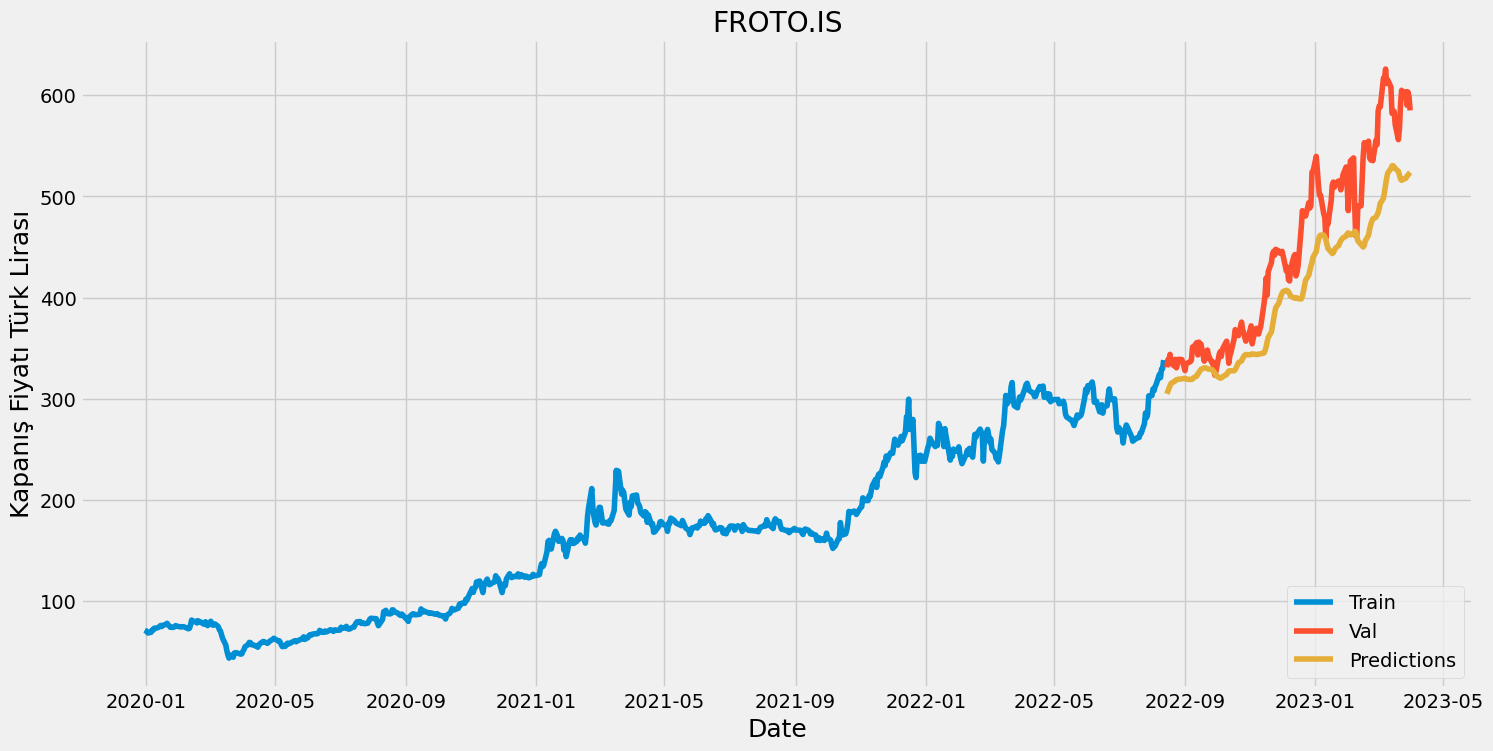

In [17]:
#Verileri çiz
train = data[:training_data_len]
valid = data[training_data_len:]
valid["Predictions"] = predictions

#Verileri görselleştirin
plt.figure(figsize=(16,8))
plt.title("FROTO.IS")
plt.xlabel("Date",fontsize=18)
plt.ylabel("Kapanış Fiyatı Türk Lirası",fontsize=18)
plt.plot(train["Close"])
plt.plot(valid[["Close","Predictions"]])
plt.legend(["Train","Val","Predictions"], loc="lower right")
plt.show()